In [1]:
import numpy as np
import matplotlib.pyplot as plt
import function as func

In [2]:
# Constants
v_c = 220.e+3 # [m/sec] speed of solar system
v_E = v_c # [m/sec] speed of earth
c = 299792458. # [m/sec] speed of light from wikipedia
k_B = 1.380649e-23 # [J/K] boltzmann constant
rbw = 1.e+3 # [Hz]
binwidth = 2.e+3 # [Hz]
TLN2 = 77 # [K]

Tan = 18.5 + 273.15
Twin = 16.7 + 273.15

In [3]:
def rebin_func(freq, data):
    rebin = 50.e+6 # [Hz]
    rebin_freq = []
    rebin_data = []
    rebin_data_std = []
    freq_0 = freq[0]
    save_data = []
    save_freq = []
    for x, y in zip(freq, data):
        if x < freq_0 + rebin:
            save_data.append(y)
            save_freq.append(x)
        else:
            rebin_data.append(np.mean(np.array(save_data)))
            rebin_freq.append(np.mean(np.array(save_freq)))
            rebin_data_std.append(np.std(np.array(save_data))/len(save_data)**0.5)
            freq_0 += rebin
            save_data = [y]
            save_freq = [x]

    return np.array(rebin_freq), np.array(rebin_data), np.array(rebin_data_std)

In [4]:
def yfactor(freq, Wamb, WLN2, Wamb_std, WLN2_std, Tamb):
    # ２点を通る直線　y = ax + b
    a = (Wamb - WLN2) / (Tamb - TLN2)
    b = Wamb - a * Tamb

    gain = a/k_B/rbw
    Trx = b/a
    a_std = (Wamb_std**2 + WLN2_std**2)**0.5 / (Tamb - TLN2)
    b_std = (Wamb_std**2 + (a_std*Tamb)**2)**0.5
    gain_std = a_std/k_B/rbw
    Trx_std = ((b*a_std/a**2)**2 + (b_std/a)**2)**0.5

    return gain, Trx, gain_std, Trx_std

def yfactor2(freq, Wamb, WLN2, Wamb_std, WLN2_std, Tamb):
    # ２点を通る直線　y = ax + b
    a = (Wamb - WLN2) / (Tamb - 100)
    b = Wamb - a * Tamb

    gain = a/k_B/rbw
    Trx = b/a
    a_std = (Wamb_std**2 + WLN2_std**2)**0.5 / (Tamb - 100)
    b_std = (Wamb_std**2 + (a_std*Tamb)**2)**0.5
    gain_std = a_std/k_B/rbw
    Trx_std = ((b*a_std/a**2)**2 + (b_std/a)**2)**0.5

    return gain, Trx, gain_std, Trx_std

In [7]:
path = "/data/ms2840a/other_data/diffraction/dBB_Ewin/on_antenna_300K.dat"
f1, P1 = func.dat_to_array(path)
path = "/data/ms2840a/other_data/diffraction/dBB_Ewin/on_antenna_77K.dat"
f2, P2 = func.dat_to_array(path)
path = "/data/ms2840a/other_data/diffraction/dBB_Ewin/on_window_300K.dat"
f3, P3 = func.dat_to_array(path)
path = "/data/ms2840a/other_data/diffraction/dBB_Ewin/on_window_77K.dat"
f4, P4 = func.dat_to_array(path)

rebin = 50e+6
f1, P1, P1e = func.any_rebin_func(f1, P1, rebin)
f2, P2, P2e = func.any_rebin_func(f2, P2, rebin)
f3, P3, P3e = func.any_rebin_func(f3, P3, rebin)
f4, P4, P4e = func.any_rebin_func(f4, P4, rebin)

Text(0.5, 1.0, 'Real Data')

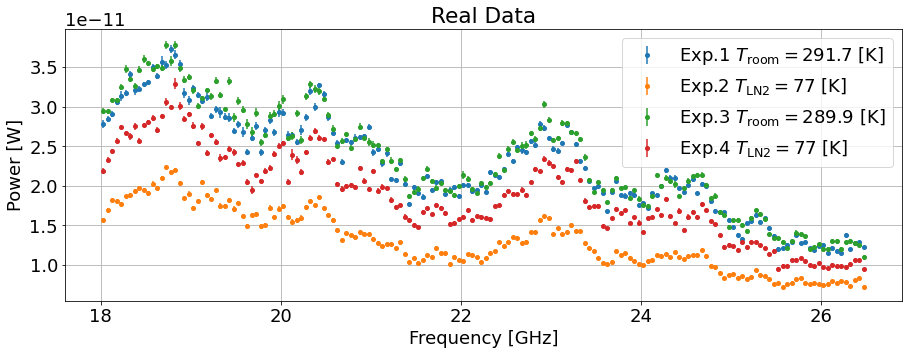

In [8]:
plt.figure(figsize=(15,5))
plt.rcParams["font.size"] = 18

plt.errorbar(f1/1e+9, P1, yerr=P1e, fmt="o", ms=4, label=r"Exp.1 $T_{\rm room}=291.7 ~\rm [K]$")
plt.errorbar(f2/1e+9, P2, yerr=P2e, fmt="o", ms=4, label=r"Exp.2 $T_{\rm LN2}=77 ~\rm [K]$")
plt.errorbar(f3/1e+9, P3, yerr=P3e, fmt="o", ms=4, label=r"Exp.3 $T_{\rm room}=289.9 ~\rm [K]$")
plt.errorbar(f4/1e+9, P4, yerr=P4e, fmt="o", ms=4, label=r"Exp.4 $T_{\rm LN2}=77 ~\rm [K]$")
plt.grid()
plt.legend()
plt.xlabel("Frequency [GHz]")
plt.ylabel("Power [W]")
plt.title("Real Data")
#plt.savefig("../result_figure/diffraction/real_data.pdf")

In [14]:
gain, Trx, gain_std, Trx_std = yfactor2(f1, P1, P2, P1e, P2e, Tan)

In [15]:
de = (P3 - P4) / gain / (Twin - TLN2) / k_B / rbw
_a = (P3e**2 + P4e**2) / (gain * (Twin - TLN2) * k_B * rbw)**2
_b = ((P3 - P4) * gain_std / gain**2 / (Twin - TLN2) / k_B / rbw)**2
dee = (_a + _b)**0.5

In [16]:
Ts = P4 / (gain*k_B*rbw) - TLN2*de - Trx
_c = P4e**2 / (gain*k_B*rbw)**2
_d = (P4*gain_std / (gain**2 * (k_B*rbw)))**2
_e = (TLN2*dee)**2
_f = Trx_std**2
Tse = (_c + _d + _e + _f)**0.5

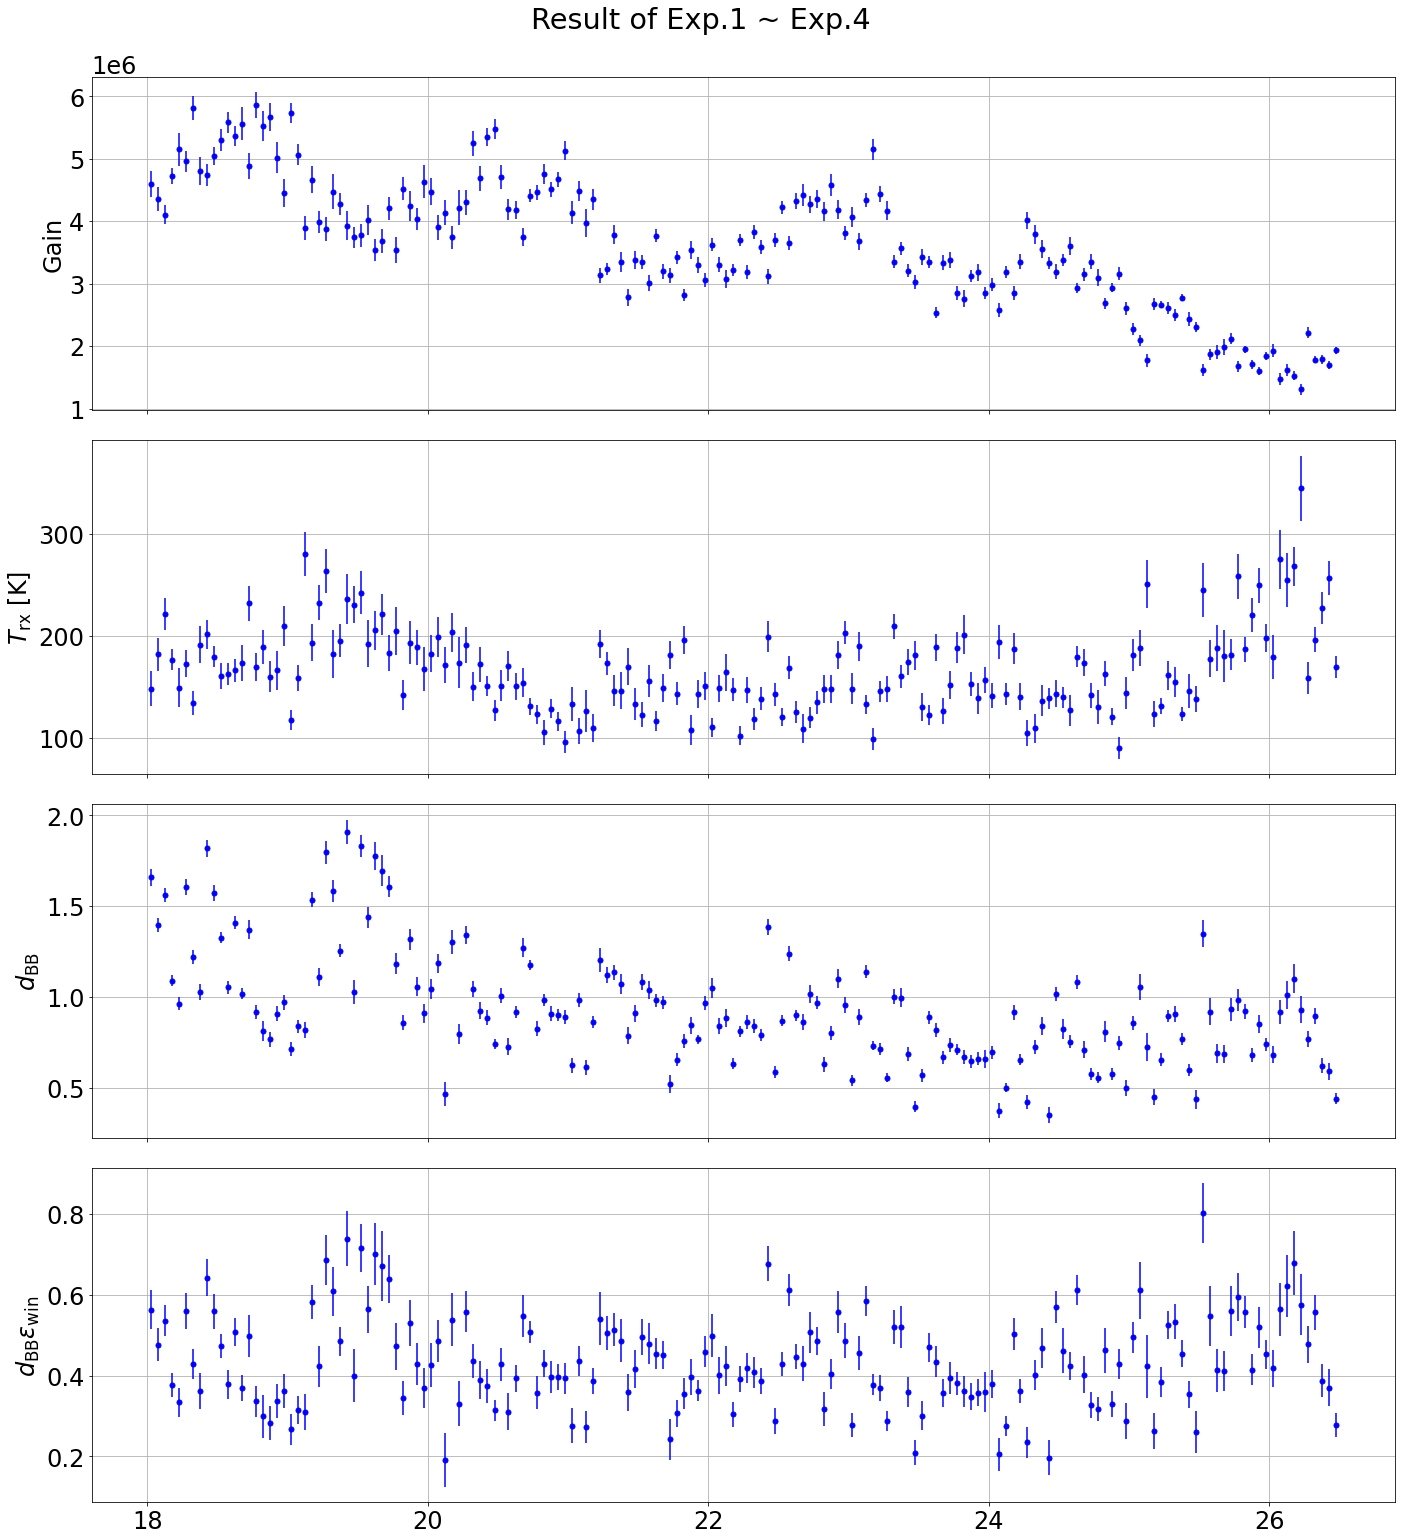

In [40]:
plt.rcParams["font.size"] = 24
fig, axes = plt.subplots(4,1,figsize=(20,22), squeeze=False, sharex=True)
fig.suptitle("Result of Exp.1 ~ Exp.4")

ax = axes[0][0]
ax.errorbar(f1/1e+9, gain, yerr=gain_std, capsize=0, fmt='o', markersize=5, ecolor="blue", markeredgecolor="blue", color="blue")
ax.grid()
ax.set_ylabel("Gain")

ax = axes[1][0]
ax.errorbar(f1/1e+9, Trx, yerr=Trx_std, capsize=0, fmt='o', markersize=5, ecolor="blue", markeredgecolor="blue", color="blue")
ax.grid()
ax.set_ylabel(r"$T_{\rm rx}$ [K]")

ax = axes[2][0]
ax.errorbar(f1/1e+9, de/(0.475+0.034*(f1/1e9 - 22)), yerr=dee, capsize=0, fmt='o', markersize=5, ecolor="blue", markeredgecolor="blue", color="blue")
ax.grid()
#ax.set_ylim([-0.05,1.05])
ax.set_ylabel(r"$d_{\rm BB}$")

"""
ax = axes[3][0]
ax.errorbar(f1/1e+9, Ts, yerr=Tse, capsize=0, fmt='o', markersize=5, ecolor="blue", markeredgecolor="blue", color="blue")
ax.grid()
ax.set_xlabel("Frequency [GHz]")
ax.set_ylabel(r"$T_{\rm side}(1 - \epsilon_{\rm win})$ [K]")
"""

ax = axes[3][0]
ax.errorbar(f1/1e+9, de, yerr=dee, capsize=0, fmt='o', markersize=5, ecolor="blue", markeredgecolor="blue", color="blue")
ax.grid()
#ax.set_ylim([-0.05,1.05])
ax.set_ylabel(r"$d_{\rm BB}\epsilon_{\rm win}$")
                    
fig.tight_layout()

#plt.savefig("../result_figure/diffraction/exp1_exp4.pdf")

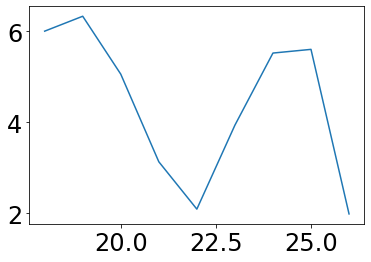

In [46]:
# Constants
rbw = 3.e+2 # [Hz]

TBB = 13 + 273.15

P5 = np.array([])
P5e = np.array([])
P6 = np.array([])
P6e = np.array([])

f = np.arange(18, 27, 1)
for freq in range(18, 27, 1):
    dw = np.array([])
    dn = np.array([])
    for num in range(3):
        path = "/data/ms2840a/other_data/diffraction/dDP_again/diffw{}_{}.dat".format(num, freq)
        dw = np.append(dw, np.max(func.dat_to_array(path)[1]))
        path = "/data/ms2840a/other_data/diffraction/dDP_again/diff{}_{}.dat".format(num, freq)
        dn = np.append(dn, np.max(func.dat_to_array(path)[1]))
    
    P5 = np.append(P5, np.mean(dw))
    P5e = np.append(P5e, np.std(dw))
    P6 = np.append(P6, np.mean(dn))
    P6e = np.append(P6e, np.std(dn))
    
plt.plot(f, P5/P6)
#plt.plot(f, P6/P5)

Text(0.5, 1.0, 'Result of $d_{\\rm DP}$')

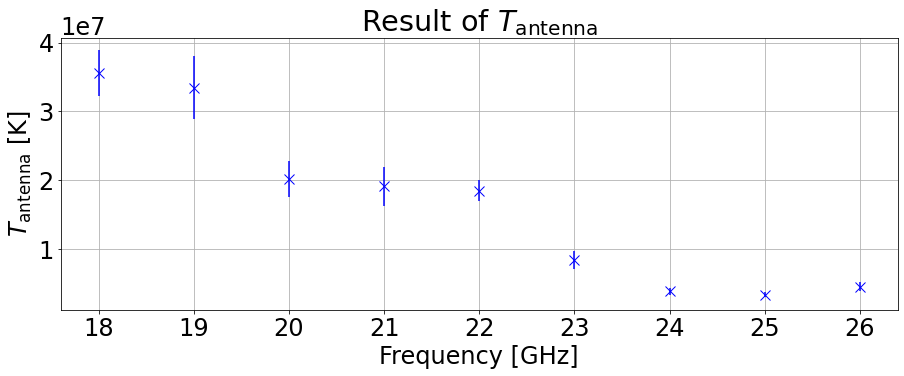

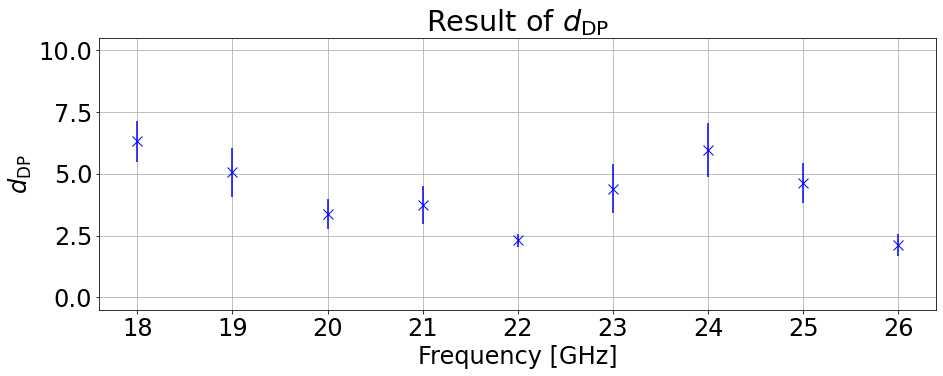

In [32]:
gain_DP = np.array([np.mean(gain[i*20:i*20+10]) for i in range(9)])
Trx_DP = np.array([np.mean(Trx[i*20:i*20+10]) for i in range(9)])
gain_DP_e = np.array([np.std(gain[i*20:i*20+10]) for i in range(9)])
Trx_DP_e = np.array([np.std(Trx[i*20:i*20+10]) for i in range(9)])
Tante = P6/(gain_DP*k_B*rbw) - TBB - Trx_DP
dDP = (P5/(gain_DP*k_B*rbw) - TBB - Trx_DP)/Tante

Tante_e = ((P6e/(gain_DP*k_B*rbw))**2 + (P6*gain_DP_e/((gain_DP**2)*k_B*rbw))**2 + Trx_DP_e**2)**0.5
dDP_e = (((P5e/(gain_DP*k_B*rbw))**2 + (P5*gain_DP_e/((gain_DP**2)*k_B*rbw))**2 + Trx_DP_e**2)/Tante**2 + (dDP*Tante_e/Tante)**2)**0.5

plt.figure(figsize=(15,5))
plt.errorbar(np.arange(18, 27, 1), Tante, yerr=Tante_e, capsize=0, fmt='x', markersize=10, ecolor="blue", markeredgecolor="blue", color="blue")
plt.grid()
plt.xlabel("Frequency [GHz]")
plt.ylabel(r"$T_{\rm antenna}$ [K]")
plt.title(r"Result of $T_{\rm antenna}$")
plt.title(r"Result of $T_{\rm antenna}$")
#plt.savefig("../result_figure/diffraction/Tantenna.pdf")

plt.figure(figsize=(15,5))
plt.errorbar(np.arange(18, 27, 1), dDP, yerr=dDP_e, capsize=0, fmt='x', markersize=10, ecolor="blue", markeredgecolor="blue", color="blue")
plt.grid()
plt.xlabel("Frequency [GHz]")
plt.ylabel(r"$d_{\rm DP}$")
plt.ylim([-0.5, 10.5])
plt.title(r"Result of $d_{\rm DP}$")
#plt.savefig("../result_figure/diffraction/dDP.pdf")

Text(0.5, 1.0, 'Result of $d_{\\rm DP}$')

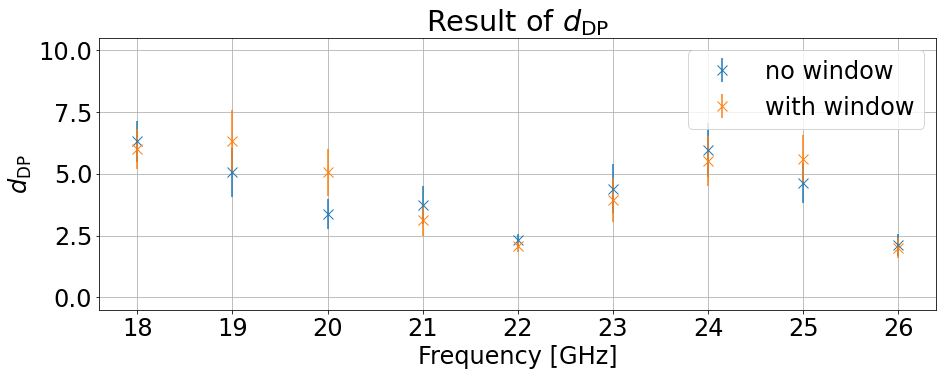

In [35]:
# Constants
rbw = 3.e+2 # [Hz]

TBB = 13 + 273.15

P5 = np.array([])
P5e = np.array([])
P6 = np.array([])
P6e = np.array([])

f = np.arange(18, 27, 1)
for freq in range(18, 27, 1):
    dw = np.array([])
    dn = np.array([])
    for num in range(3):
        path = "/data/ms2840a/other_data/diffraction/dDP_again/diffn{}_{}.dat".format(num, freq)
        dw = np.append(dw, np.max(func.dat_to_array(path)[1]))
        path = "/data/ms2840a/other_data/diffraction/dDP_again/diff{}_{}.dat".format(num, freq)
        dn = np.append(dn, np.max(func.dat_to_array(path)[1]))
    
    P5 = np.append(P5, np.mean(dw))
    P5e = np.append(P5e, np.std(dw))
    P6 = np.append(P6, np.mean(dn))
    P6e = np.append(P6e, np.std(dn))
    
gain_DP = np.array([np.mean(gain[i*20:i*20+10]) for i in range(9)])
Trx_DP = np.array([np.mean(Trx[i*20:i*20+10]) for i in range(9)])
gain_DP_e = np.array([np.std(gain[i*20:i*20+10]) for i in range(9)])
Trx_DP_e = np.array([np.std(Trx[i*20:i*20+10]) for i in range(9)])
Tante = P6/(gain_DP*k_B*rbw) - TBB - Trx_DP
dDP = (P5/(gain_DP*k_B*rbw) - TBB - Trx_DP)/Tante

Tante_e = ((P6e/(gain_DP*k_B*rbw))**2 + (P6*gain_DP_e/((gain_DP**2)*k_B*rbw))**2 + Trx_DP_e**2)**0.5
dDP_e = (((P5e/(gain_DP*k_B*rbw))**2 + (P5*gain_DP_e/((gain_DP**2)*k_B*rbw))**2 + Trx_DP_e**2)/Tante**2 + (dDP*Tante_e/Tante)**2)**0.5

plt.figure(figsize=(15,5))
plt.errorbar(np.arange(18, 27, 1), dDP, yerr=dDP_e, capsize=0, fmt='x', markersize=10, label="no window")


P5 = np.array([])
P5e = np.array([])
P6 = np.array([])
P6e = np.array([])

f = np.arange(18, 27, 1)
for freq in range(18, 27, 1):
    dw = np.array([])
    dn = np.array([])
    for num in range(3):
        path = "/data/ms2840a/other_data/diffraction/dDP_again/diffw{}_{}.dat".format(num, freq)
        dw = np.append(dw, np.max(func.dat_to_array(path)[1]))
        path = "/data/ms2840a/other_data/diffraction/dDP_again/diff{}_{}.dat".format(num, freq)
        dn = np.append(dn, np.max(func.dat_to_array(path)[1]))
    
    P5 = np.append(P5, np.mean(dw))
    P5e = np.append(P5e, np.std(dw))
    P6 = np.append(P6, np.mean(dn))
    P6e = np.append(P6e, np.std(dn))
    
gain_DP = np.array([np.mean(gain[i*20:i*20+10]) for i in range(9)])
Trx_DP = np.array([np.mean(Trx[i*20:i*20+10]) for i in range(9)])
gain_DP_e = np.array([np.std(gain[i*20:i*20+10]) for i in range(9)])
Trx_DP_e = np.array([np.std(Trx[i*20:i*20+10]) for i in range(9)])
Tante = P6/(gain_DP*k_B*rbw) - TBB - Trx_DP
dDP = (P5/(gain_DP*k_B*rbw) - TBB - Trx_DP)/Tante

Tante_e = ((P6e/(gain_DP*k_B*rbw))**2 + (P6*gain_DP_e/((gain_DP**2)*k_B*rbw))**2 + Trx_DP_e**2)**0.5
dDP_e = (((P5e/(gain_DP*k_B*rbw))**2 + (P5*gain_DP_e/((gain_DP**2)*k_B*rbw))**2 + Trx_DP_e**2)/Tante**2 + (dDP*Tante_e/Tante)**2)**0.5

plt.errorbar(np.arange(18, 27, 1), dDP, yerr=dDP_e, capsize=0, fmt='x', markersize=10, label="with window")



plt.grid()
plt.legend()
plt.xlabel("Frequency [GHz]")
plt.ylabel(r"$d_{\rm DP}$")
plt.ylim([-0.5, 10.5])
plt.title(r"Result of $d_{\rm DP}$")
#plt.savefig("../result_figure/diffraction/dDP.pdf")